# Data Download

In [1]:
!pip install kaggle

In [2]:
# Move it to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#CIFAR-10 api dataset
!kaggle competitions download -c cifar-10

 92% 660M/715M [00:03<00:00, 99.0MB/s]
100% 715M/715M [00:03<00:00, 200MB/s] 


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
#since train and test data arre in 7z zip format we will install
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 21.7 MB/s eta 0:00:00


In [8]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


# Deep Learning

Importing dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames=os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['2248.png', '10638.png', '3602.png', '19242.png', '24970.png']
['23620.png', '4338.png', '2539.png', '36963.png', '14382.png']


Labels processing

In [15]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [19]:
labels_dict={
    'airplane':0,
    'automobile':1,
    'bird':2,
    'cat':3,
    'deer':4,
    'dog':5,
    'frog':6,
    'horse':7,
    'ship':8,
    'truck':9
}

In [20]:
labels=[labels_dict[i] for i in labels_df['label']]

In [21]:
labels[0:5]

[6, 9, 9, 4, 1]

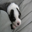

In [22]:
# display sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [23]:
id_list=list(labels_df['id'])

In [24]:
id_list[0:5]

[1, 2, 3, 4, 5]

Image processing

In [25]:
#Convert images to numpy arrays

# train_data_folder='/content/train/'

# data=[]

# for id in id_list:
#   img_path=train_data_folder+str(id)+'.png'
#   print(img_path)

#   if id>=5:
#     break

In [26]:
#Convert images to numpy arrays

train_data_folder='/content/train/'

data=[]

for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [27]:
type(data)

list

In [28]:
len(data)

50000

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape
# height x width x rgb

(32, 32, 3)

In [31]:
# convert image list and label list to numpy arrays
x=np.array(data)
y=np.array(labels)

In [32]:
type(x)

numpy.ndarray

In [33]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train test split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [36]:
print(y.shape,y_train.shape,y_test.shape)

(50000,) (40000,) (10000,)


In [37]:
#scale the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

Building a neural network

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
number_of_classes=10

#setting up layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(number_of_classes,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# training the neural network
model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2278 - loss: 2.1015 - val_accuracy: 0.3235 - val_loss: 1.8724
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3369 - loss: 1.8441 - val_accuracy: 0.3683 - val_loss: 1.7808
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3589 - loss: 1.7859 - val_accuracy: 0.3746 - val_loss: 1.7564
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3764 - loss: 1.7414 - val_accuracy: 0.3702 - val_loss: 1.7238
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3796 - loss: 1.7224 - val_accuracy: 0.3828 - val_loss: 1.7089
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3857 - loss: 1.7096 - val_accuracy: 0.3890 - val_loss: 1.6988
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3932 - loss: 1.6961 - val_accuracy: 0.3995 - val_loss: 1.6869
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3992 - loss: 1.6808 - 

Model trained from scratch have pretty less accuracy so we will see a pretrained model for this

We will use ResNet50

In [42]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [43]:
convolutional_base=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
#                           weigths= weight of imagenet data used for training resnet
#                                    imagent data have similar data to cifar train data
#                           include_top=We wont use all the output lays since we only need 10 classes here
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [44]:
number_of_classes=10
#adding our own layers to this model
modelRN=models.Sequential()
modelRN.add(layers.UpSampling2D((2,2)))           #for upscaling image 32->64
modelRN.add(layers.UpSampling2D((2,2)))           #for upscaling image 64->128
modelRN.add(layers.UpSampling2D((2,2)))           #for upscaling image 128->256 since 256 is the input shape of resnet
modelRN.add(convolutional_base)                   #convolutional base added to modelRN
modelRN.add(layers.Flatten())                     #Converts the matrix into a vector of single column
modelRN.add(layers.BatchNormalization())          #Normalise the size of batch
modelRN.add(layers.Dense(128,activation='relu'))
modelRN.add(layers.Dropout(0.5))                  #to prevent overfitting
modelRN.add(layers.BatchNormalization())
modelRN.add(layers.Dense(64,activation='relu'))
modelRN.add(layers.Dropout(0.5))
modelRN.add(layers.BatchNormalization())
modelRN.add(layers.Dense(number_of_classes,activation='relu'))

In [45]:
modelRN.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy',metrics=['acc'])

In [46]:
history=modelRN.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 432s 339ms/step - acc: 0.1540 - loss: 7.9718 - val_acc: 0.4260 - val_loss: 4.3395
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - acc: 0.2956 - loss: 5.0818 - val_acc: 0.5782 - val_loss: 2.6785
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 342ms/step - acc: 0.3774 - loss: 4.0928 - val_acc: 0.6455 - val_loss: 2.2375
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 334ms/step - acc: 0.4244 - loss: 3.5450 - val_acc: 0.6798 - val_loss: 1.9931
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 390s 342ms/step - acc: 0.4525 - loss: 3.1516 - val_acc: 0.6830 - val_loss: 2.3949
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 343ms/step - acc: 0.4955 - loss: 2.7961 - val_acc: 0.7570 - val_loss: 1.4833
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 342ms/step - acc: 0.5208 - loss: 2.5517 - val_acc: 0.7253 - val_loss: 2.0116
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 342ms/step - acc: 0.5589 - loss: 2.3243 - val_acc: 0.7958 - val_loss: 1.1557
Epoch 9/

In [47]:
loss,accuracy=modelRN.evaluate(x_test_scaled,y_test)
print('Test Accuracy',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - acc: 0.8111 - loss: 1.1320
Test Accuracy 0.8180000185966492


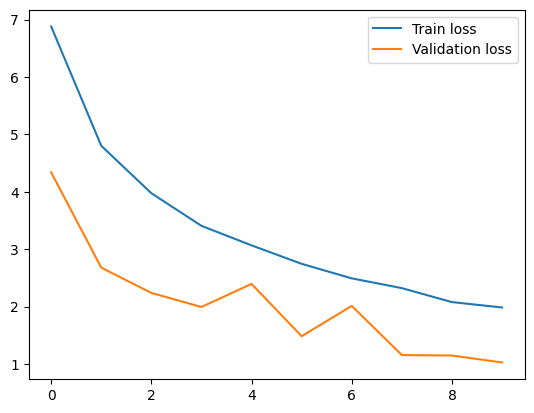

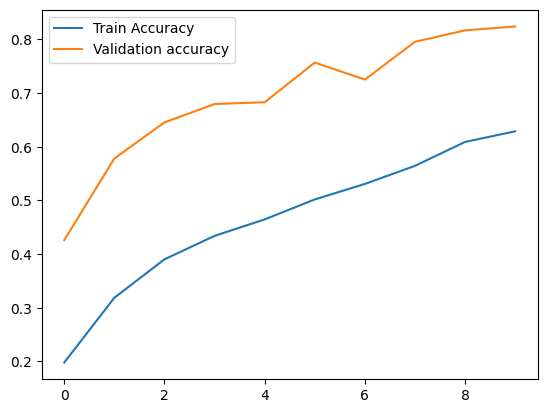

In [48]:
h=history
#plot the loss function value
plt.plot(h.history['loss'],label='Train loss')
plt.plot(h.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

#plot the accuracy function valu
plt.plot(h.history['acc'],label='Train Accuracy')
plt.plot(h.history['val_acc'],label='Validation accuracy')
plt.legend()
plt.show()